In [16]:
import argparse
import imutils
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
def display_img(img):
    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [18]:
def edge(img):
    #img = cv2.equalizeHist(img)
    med_val = np.median(img)
    blurred_img = cv2.blur(img,ksize=(1,1))
    lower = int(max(0, 0.1* med_val))
    upper = int(min(255,1.9 * med_val))
    edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper)
    cnts = cv2.findContours(edges, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    x,y=img.shape
    external_contours = np.zeros((x,y,3))
    for c in cnts:
        M = cv2.moments(c)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.drawContours(external_contours, [c], -1, (255, 255, 255), 2)
    return external_contours

In [19]:
def gradient(img):
    sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=11)
    sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=11)
    laplacian = cv2.Laplacian(img,cv2.CV_64F)
    sobel = cv2.addWeighted(src1=sobelx,alpha=0.5,src2=sobely,beta=0.5,gamma=0)
    kernel = np.ones((7),np.uint8)
    gradient = cv2.morphologyEx(laplacian,cv2.MORPH_GRADIENT,kernel)
    ret,th1 = cv2.threshold(gradient,10,100,cv2.THRESH_BINARY)
    return th1

In [2]:
import cv2 
import numpy as np
import imutils

def gradient(img):
    sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=1)
    sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=1)
    laplacian = cv2.Laplacian(img,cv2.CV_64F)
    sobel = cv2.addWeighted(src1=sobelx,alpha=0.5,src2=sobely,beta=0.5,gamma=0)
    kernel = np.ones((9),np.uint8)
    gradient = cv2.morphologyEx(laplacian,cv2.MORPH_GRADIENT,kernel)
    ret,th1 = cv2.threshold(gradient,50,100,cv2.THRESH_BINARY)
    return th1

def edge(img):
    #img = cv2.equalizeHist(img)
    med_val = np.median(img)
    blurred_img = cv2.blur(img,ksize=(4,4))
    lower = int(max(0, 0.9* med_val))
    upper = int(min(255,1.1 * med_val))
    edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper)
    cnts = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    x,y=img.shape
    external_contours = np.zeros((x,y,3))
    for c in cnts:
        M = cv2.moments(c)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.drawContours(external_contours, [c], -1, (255, 255, 255), 2)
    return external_contours

# Capture the frame
cap = cv2.VideoCapture(1,cv2.CAP_DSHOW)
focus = 10 # min: 0, max: 255, increment:5
cap.set(28, focus)
while True:
    ret, img_o = cap.read()
    cv2.imwrite('snapshot.png', img_o)
    img = cv2.imread('snapshot.png',0)
    cv2.imshow('original1',img_o)
    cv2.imshow('processed1', edge(img))
    # cv2.imshow('processed2', gradient(img))
    
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[605 477]]

 [[604 478]]

 [[603 478]]

 [[603 479]]

 [[605 477]]

 [[606 477]]

 [[608 479]]

 [[609 478]]

 [[608 478]]

 [[607 477]]]


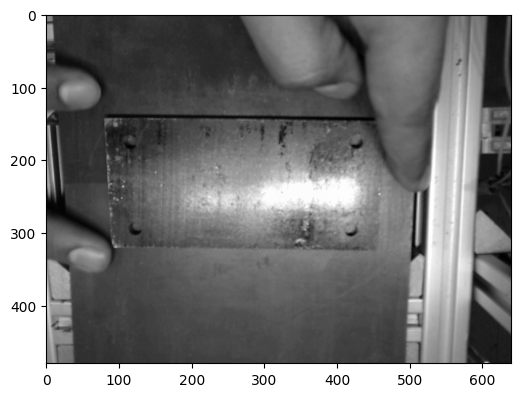

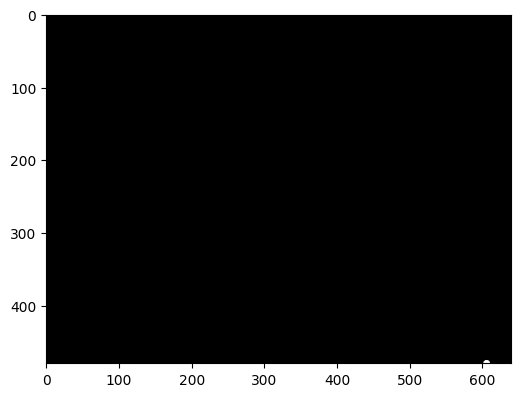

In [24]:
# img = cv2.imread('dataset\Training\Defect-free\DF (1).jpg',0)
img = cv2.imread('snapshot.png',0)
# img = cv2.equalizeHist(img)
med_val = np.median(img)
blurred_img = cv2.blur(img,ksize=(3,3))
lower = int(max(0, 0.1* med_val))
upper = int(min(255,1.9 * med_val))
edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper)
cnts = cv2.findContours(edges, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
x,y=img.shape
external_contours = np.zeros((x,y,3))
for c in cnts:
    M = cv2.moments(c)
    print(c)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv2.drawContours(external_contours, [c], -1, (255, 255, 255), 2)
    break
        
display_img(img)
display_img(external_contours)

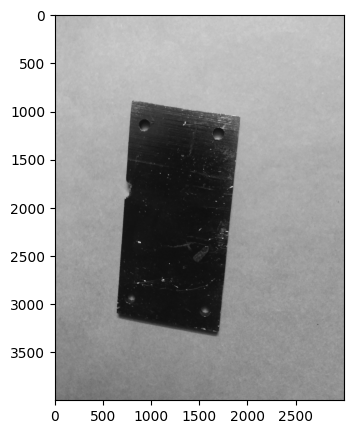

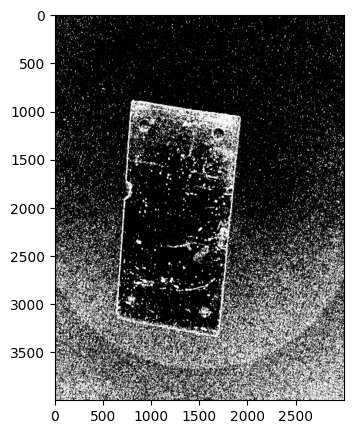

In [15]:
img = cv2.imread('dataset\Training\Defective\D (105).jpg',0)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=11)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=11)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobel = cv2.addWeighted(src1=sobelx,alpha=0.5,src2=sobely,beta=0.5,gamma=0)

kernel = np.ones((7),np.uint8)
gradient = cv2.morphologyEx(laplacian,cv2.MORPH_GRADIENT,kernel)

ret,th1 = cv2.threshold(gradient,10,100,cv2.THRESH_BINARY)

display_img(img)
display_img(th1)

In [14]:
import cv2 
import time

str_i=''
for i in range(100):
    print(i)
    str_i=str(i)
    path='dataset_new/Training/Defect-free/DF_'+str_i+'.jpg'
    path1='dataset_new/Training/Defect-free-processed/DF_'+str_i+'.jpg'
    img = cv2.imread(path,0)
    img=edge(img)
    cv2.imwrite(path1, img)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
